In [166]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

checkpoint_name = "finetuning_0.1_0.1"
# checkpoint_name = "default"
sim_type = "jac_"   # "jac_" or ""
sim_title = "Jaccard" if sim_type == "jac_" else "Cosine"

## Plot sim between consecutive images

In [167]:
# sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/similarities_10000-10099.pkl"
sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/{sim_type}similarities_10000-10099.pkl"

with open(sim_path, "rb") as f:
    sims = pickle.load(f)

In [168]:
# cosine sim between consecutive images
consec_frame_sims = [list() for _ in range(128)]
for video_id in sorted(sims.keys()):
    for frame_id in sorted(sims[video_id].keys()):
        consec_frame_sims[int(frame_id)].append(sims[video_id][frame_id])

valid_indices = [i for i in range(len(consec_frame_sims)) if len(consec_frame_sims[i]) > 0]

consec_sim_means = np.array([np.mean(consec_frame_sims[i]) for i in valid_indices])
consec_sim_std = np.array([np.std(consec_frame_sims[i]) for i in valid_indices])

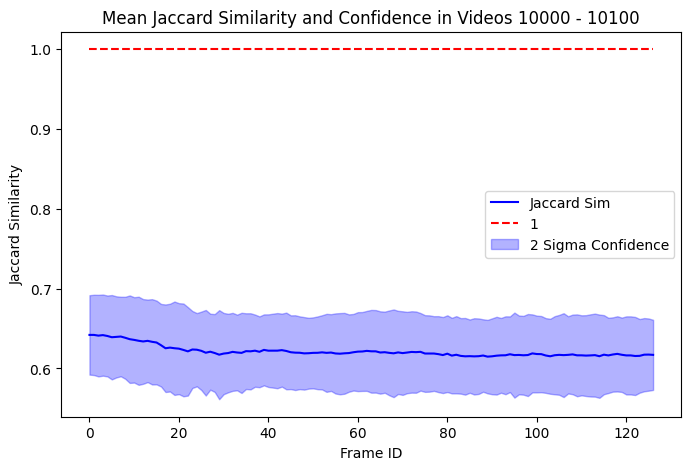

In [169]:
plt.figure(figsize=(8, 5))
plt.plot(valid_indices, consec_sim_means, color='b')
plt.plot(valid_indices, np.ones_like(consec_sim_means), color="r", linestyle="--")
plt.fill_between(valid_indices, consec_sim_means + 2 * consec_sim_std, consec_sim_means - 2 * consec_sim_std, color="b", alpha=0.3)

plt.xlabel("Frame ID")
plt.ylabel(f"{sim_title} Similarity")
plt.legend([f"{sim_title} Sim", "1", "2 Sigma Confidence"])
plt.title(f"Mean {sim_title} Similarity and Confidence in Videos 10000 - 10100")
plt.show()

In [170]:
# mean cosine sim of all image pairs
print(np.mean(consec_sim_means))
print(np.mean(consec_sim_std))

0.6213288906895175
0.02469626740191966


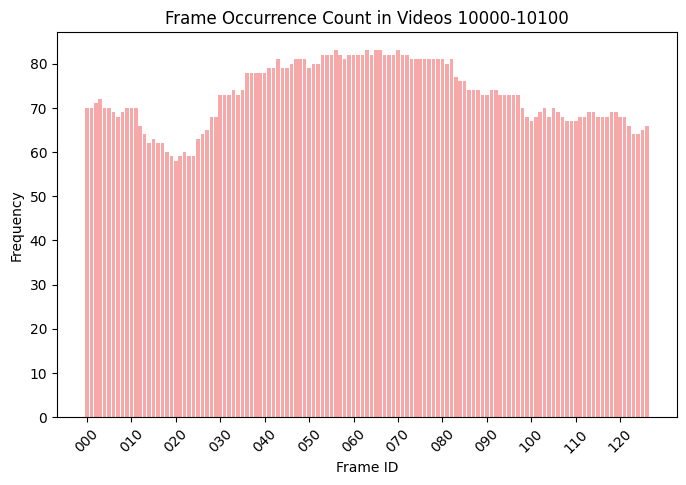

In [171]:
all_frames = [frame for frames in sims.values() for frame in frames]

# Step 2: Count occurrences of each frame
frame_counts = Counter(all_frames)

# Step 3: Sort frames
sorted_frames = sorted(frame_counts.keys())  # Sort frame IDs alphabetically/numerically
sorted_counts = [frame_counts[frame] for frame in sorted_frames]  # Adjust values accordingly

# Step 4: Plot bar chart
plt.figure(figsize=(8, 5))
# plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')
plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')

plt.xlabel("Frame ID")
plt.ylabel("Frequency")
plt.title("Frame Occurrence Count in Videos 10000-10100")
n = 10  # Adjust this number to control density
plt.xticks(ticks=np.arange(0, len(sorted_frames), n), labels=sorted_frames[::n], rotation=45)
plt.show()

In [172]:
# number of image pairs we got a similarity for
np.sum(sorted_counts)

9277

## Plot sims for each slots

In [173]:
slot_sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/slot_{sim_type}similarities_10000-10099.pkl"

with open(slot_sim_path, "rb") as f:
    slot_sims = pickle.load(f)

In [174]:
num_slots = 4

# cosine sim between consecutive images
slot_frame_sims = [[list() for _ in range(128)] for _ in range(num_slots)]
for video_id in sorted(slot_sims.keys()):
    for frame_id in sorted(slot_sims[video_id].keys()):
        for slot_id in sorted(slot_sims[video_id][frame_id].keys()):
            slot_frame_sims[slot_id][int(frame_id)].append(slot_sims[video_id][frame_id][slot_id])

valid_indices = [i for i in range(len(slot_frame_sims[0])) if len(slot_frame_sims[0][i]) > 0]

consec_slot_sim_means = np.array([np.mean(slot_frame_sims[s][i]) for s in range(num_slots) for i in valid_indices]).reshape(num_slots, len(valid_indices))
consec_slot_sim_std = np.array([np.std(slot_frame_sims[s][i]) for s in range(num_slots) for i in valid_indices]).reshape(num_slots, len(valid_indices))

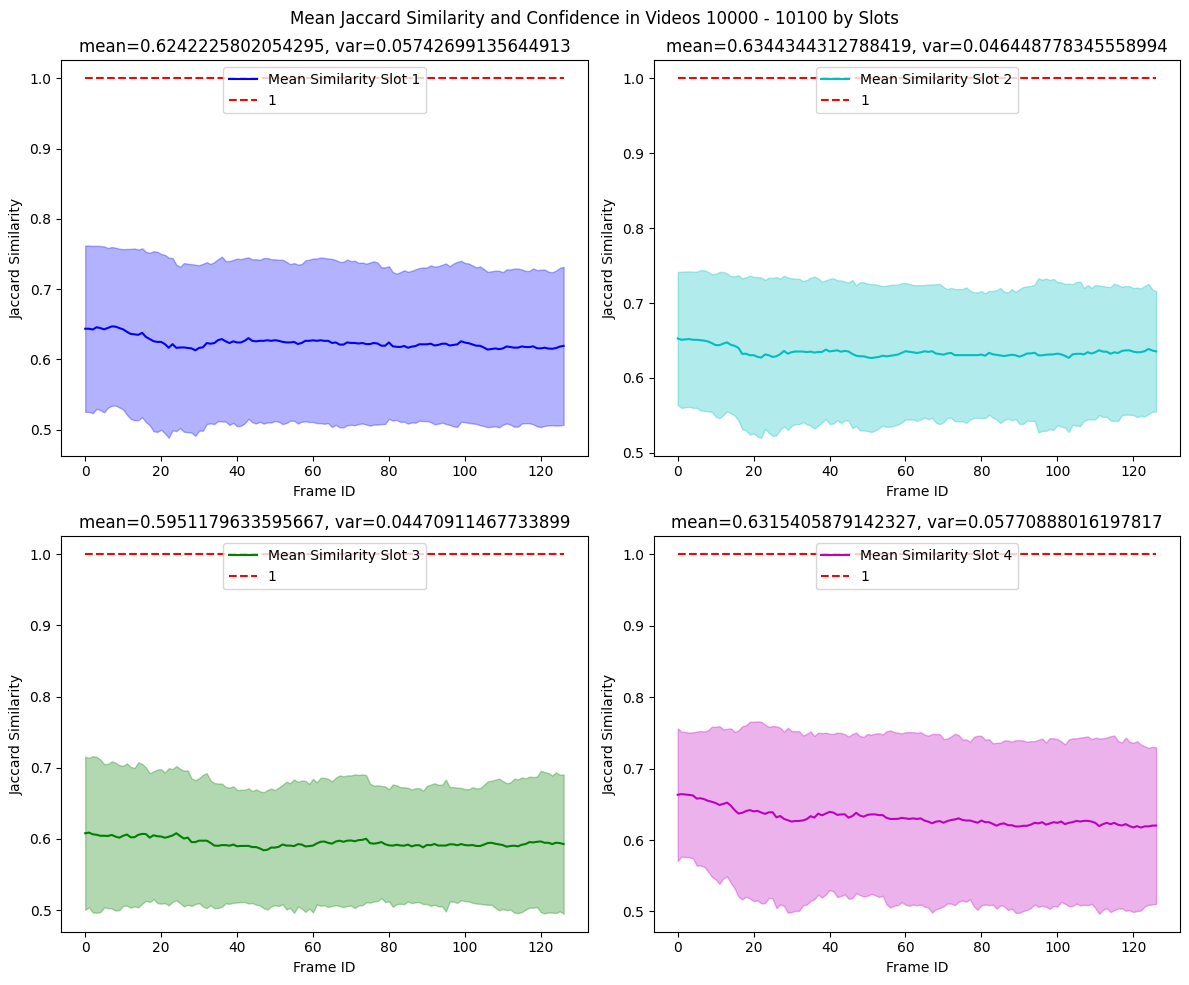

In [175]:
colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i < num_slots:  # Ensure we don't go out of bounds
        ax.plot(valid_indices, consec_slot_sim_means[i], color=colors[i])
        ax.plot(valid_indices, np.ones_like(consec_slot_sim_means[0]), color="r", linestyle="--")
        
        # Optional: Confidence Interval
        ax.fill_between(
            valid_indices, 
            consec_slot_sim_means[i] + 2 * consec_slot_sim_std[i], 
            consec_slot_sim_means[i] - 2 * consec_slot_sim_std[i], 
            color=colors[i], 
            alpha=0.3
        )
        
        ax.set_xlabel("Frame ID")
        ax.set_ylabel(f"{sim_title} Similarity")
        ax.set_title(f"mean={np.mean(consec_slot_sim_means[i])}, var={np.mean(consec_slot_sim_std[i])}")
        ax.legend([f"Mean Similarity Slot {i+1}", "1"], loc="upper center")

plt.suptitle(f"Mean {sim_title} Similarity and Confidence in Videos 10000 - 10100 by Slots")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()

In [176]:
# mean cosine sim of all image pairs
for i in range(num_slots):
    print("Slot " + str(i))
    print(np.mean(consec_slot_sim_means[i]))
    print(np.mean(consec_slot_sim_std[i]))

Slot 0
0.6242225802054295
0.05742699135644913
Slot 1
0.6344344312788419
0.046448778345558994
Slot 2
0.5951179633595667
0.04470911467733899
Slot 3
0.6315405879142327
0.05770888016197817


## Plot sim between image and mean encoding

In [177]:
sim_path = f"/app/ncb/encoding_comparison_scripts/results/{checkpoint_name}/mean_{sim_type}similarities_10000-10099.pkl"
# sim_path = "/app/ncb/encoding_comparison_scripts/results/default/similarities_10000-10099.pkl"

with open(sim_path, "rb") as f:
    mean_sims = pickle.load(f)

In [178]:
# cosine sim between consecutive images
mean_frame_sims = [list() for _ in range(128)]
for video_id in sorted(mean_sims.keys()):
    for frame_id in sorted(mean_sims[video_id].keys()):
        mean_frame_sims[int(frame_id)].append(mean_sims[video_id][frame_id])

valid_indices = [i for i in range(len(mean_frame_sims)) if len(mean_frame_sims[i]) > 0]

mean_sim_means = np.array([np.mean(mean_frame_sims[i]) for i in valid_indices])
mean_sim_std = np.array([np.std(mean_frame_sims[i]) for i in valid_indices])

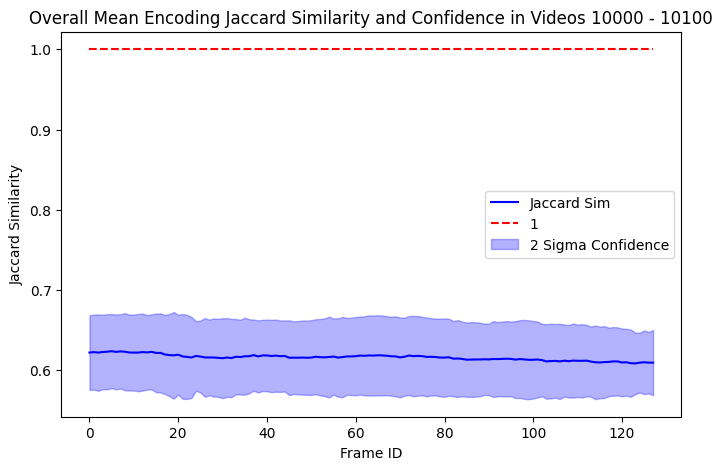

In [179]:
plt.figure(figsize=(8, 5))
plt.plot(valid_indices, mean_sim_means, color='b')
plt.plot(valid_indices, np.ones_like(mean_sim_means), color="r", linestyle="--")
plt.fill_between(valid_indices, mean_sim_means + 2 * mean_sim_std, mean_sim_means - 2 * mean_sim_std, color="b", alpha=0.3)

plt.xlabel("Frame ID")
plt.ylabel(f"{sim_title} Similarity")
plt.legend([f"{sim_title} Sim", "1", "2 Sigma Confidence"])
plt.title(f"Overall Mean Encoding {sim_title} Similarity and Confidence in Videos 10000 - 10100")
plt.show()

In [180]:
# mean cosine sim of all image pairs
print(np.mean(mean_sim_means))
print(np.mean(mean_sim_std))

0.6161011424375309
0.023415210488086115


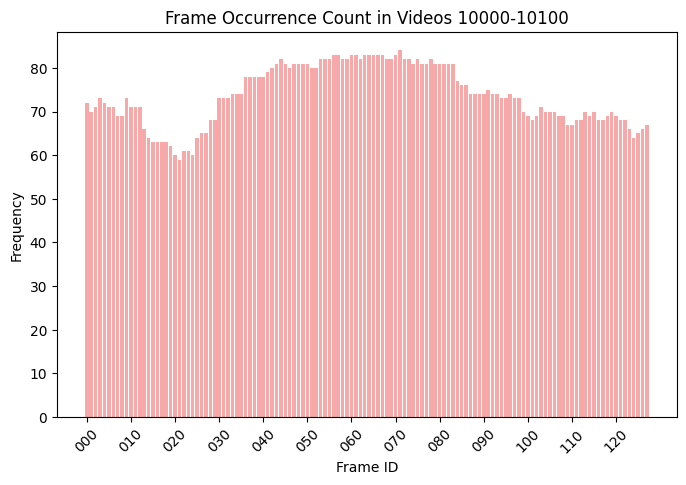

In [181]:
all_frames = [frame for frames in mean_sims.values() for frame in frames]

# Step 2: Count occurrences of each frame
frame_counts = Counter(all_frames)

# Step 3: Sort frames
sorted_frames = sorted(frame_counts.keys())  # Sort frame IDs alphabetically/numerically
sorted_counts = [frame_counts[frame] for frame in sorted_frames]  # Adjust values accordingly

# Step 4: Plot bar chart
plt.figure(figsize=(8, 5))
# plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')
plt.bar(sorted_frames, sorted_counts, color='#F7A8A8')

plt.xlabel("Frame ID")
plt.ylabel("Frequency")
plt.title("Frame Occurrence Count in Videos 10000-10100")
n = 10  # Adjust this number to control density
plt.xticks(ticks=np.arange(0, len(sorted_frames), n), labels=sorted_frames[::n], rotation=45)
plt.show()

In [182]:
# number of image pairs we got a similarity for
np.sum(sorted_counts)

9439

## Plot individual videos

In [183]:
num_slots = 4
key = sorted(sims.keys())[5]
valid_indices = sorted(sims[key].keys())
current_video_sims = np.array([sims[key][f_id] for f_id in valid_indices])
current_slot_sims = np.array([[slot_sims[key][f_id][s] for f_id in valid_indices] for s in range(num_slots)])

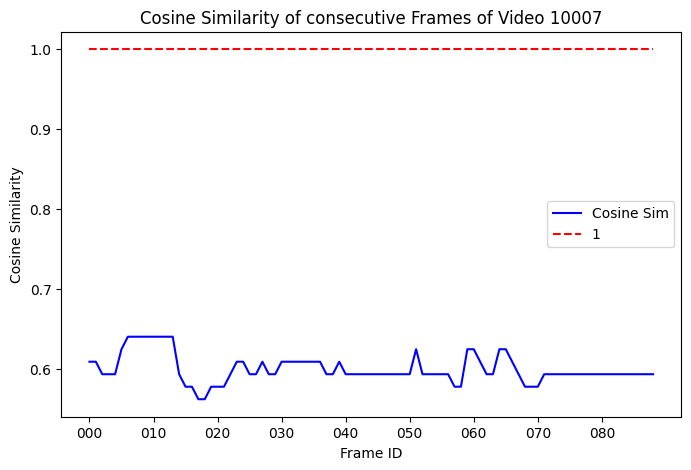

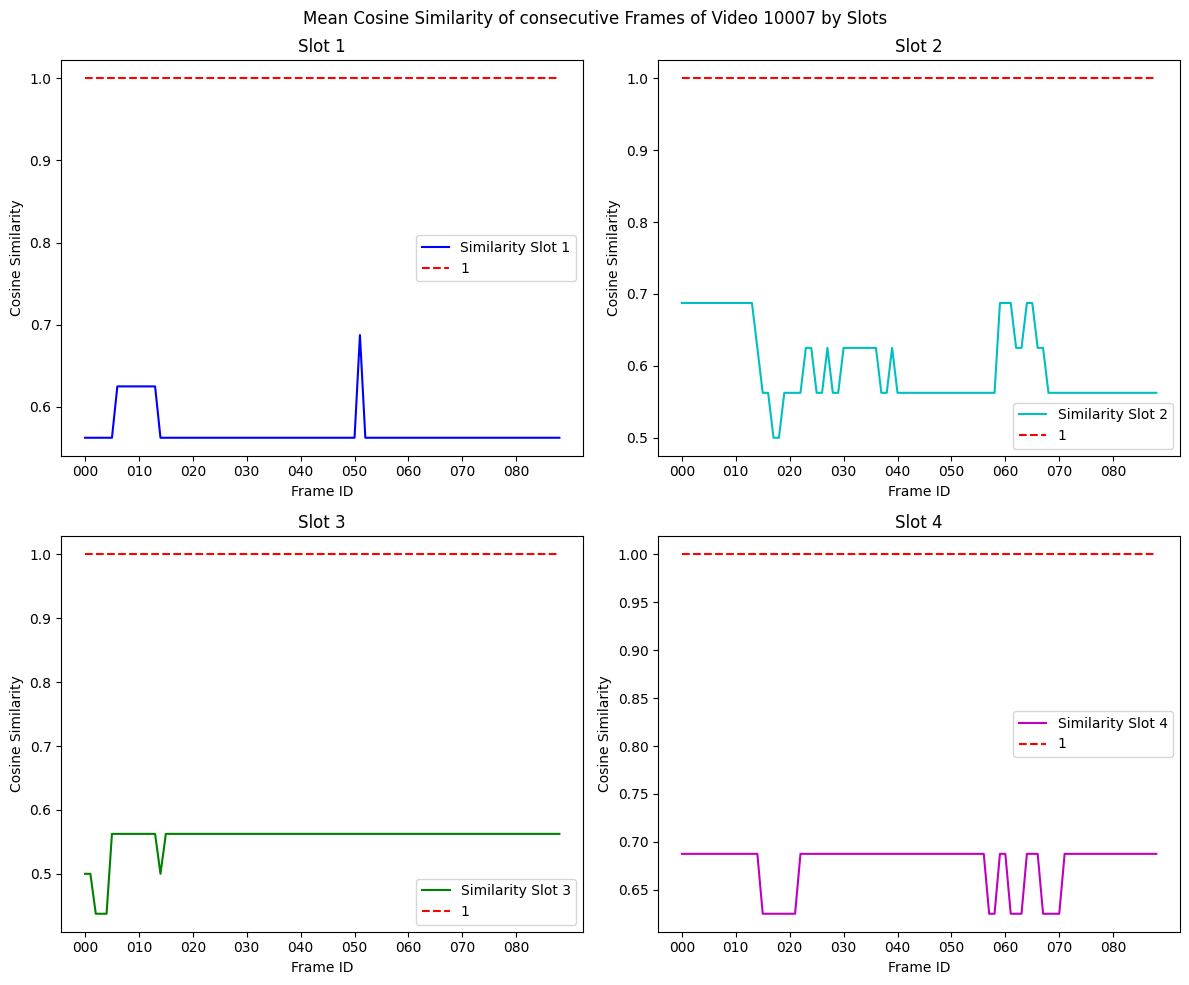

In [184]:
n = 10

plt.figure(figsize=(8, 5))
plt.plot(valid_indices, current_video_sims, color='b')
plt.plot(valid_indices, np.ones_like(current_video_sims), color="r", linestyle="--")
# plt.fill_between(valid_indices, consec_sim_means + 2 * consec_sim_std, consec_sim_means - 2 * consec_sim_std, color="b", alpha=0.3)
plt.xticks(ticks=np.arange(0, len(valid_indices), n), labels=valid_indices[::n])
plt.xlabel("Frame ID")
plt.ylabel("Cosine Similarity")
plt.legend(["Cosine Sim", "1"])
plt.title(f"Cosine Similarity of consecutive Frames of Video {key}")
plt.show()

colors = ["b", "c", "g", "m"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i < num_slots:  # Ensure we don't go out of bounds
        ax.plot(valid_indices, current_slot_sims[i], color=colors[i])
        ax.plot(valid_indices, np.ones_like(current_slot_sims[0]), color="r", linestyle="--")
        ax.set_xticks(ticks=np.arange(0, len(valid_indices), n), labels=valid_indices[::n])
        ax.set_xlabel("Frame ID")
        ax.set_ylabel("Cosine Similarity")
        ax.set_title(f"Slot {i+1}")
        ax.legend([f"Similarity Slot {i+1}", "1"])

plt.suptitle(f"Mean Cosine Similarity of consecutive Frames of Video {key} by Slots")
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.tight_layout()
plt.show()